In [1]:
from population import *
from gen_landscape import *
import numpy as np
import datetime

In [16]:
# %%
mn = 1000
points_to_set_diamond = np.array([[mn, 0], [0, mn], [-mn, 0], [0, -mn], [0, 0]])
points_to_set_sqr = np.array([[mn, mn], [-mn, mn], [-mn, -mn], [mn, -mn], [0, 0]])
# pure concave
sz = 1000
pure_concave = [-sz, -sz, -sz, -sz, 0]
concave_almost_1 = [-sz, -sz, -sz, 0, 0]
concave_almost_2 = [-sz, -sz, 0, 0, 0]
concave_almost_3 = [-sz, 0, -sz, 0, 0]
concave_almost_4 = [-sz, 0, 0, 0, 0]

flat = [0, 0, 0, 0, 0]

hill_slope = [-sz, -sz, sz, sz, 0]
saddle_almost_1 = [-sz, -sz, -sz, sz, 0]
saddle_almost_2 = [-sz, sz, sz, sz, 0]
assigned_saddle = [-sz, sz, -sz, sz, 0]

convex_almost_4 = [sz, 0, 0, 0, 0]
convex_almost_3 = [sz, 0, sz, 0, 0]
convex_almost_2 = [sz, sz, 0, 0, 0]
convex_almost_1 = [sz, sz, sz, 0, 0]
pure_convex = [sz, sz, sz, sz, 0]

list_of_assigned_fitness = [pure_concave, concave_almost_1, concave_almost_2, concave_almost_3, concave_almost_4,
                            flat, hill_slope, saddle_almost_1, saddle_almost_2, assigned_saddle,
                            convex_almost_4, concave_almost_3, concave_almost_2, concave_almost_1, pure_convex]

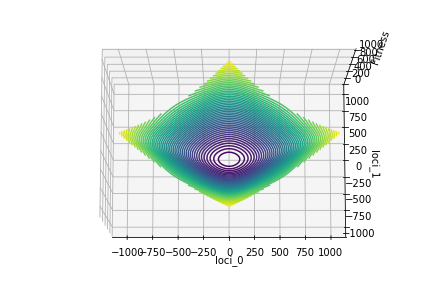

In [17]:
points_to_set = points_to_set_diamond
assigned_values = pure_convex
land = Landscape2D(points_chosen=points_to_set, points_fitness_values=assigned_values, spline=True)
land.draw()

In [7]:
gia = Population(population_size=20000, loci=2, gene_mean=0, gene_sd=10,
                 proportion_asexual=0.5, survival_rate=0.5, mutation_std=1, landscape=land)

((0.3685767436231763, 0.13655722283805377),
 (0.3679157826877974, 0.13556647207462086))

In [8]:
camera1 = Camera()
frame_rate = 5
for i in range(11000):
    if gia.population_sizes(asex=True) < 100:
        result = 2
        break
    elif gia.population_sizes(sex=True) < 100:
        result = 1
        break
    elif i > 10000:
        result = 0
        break
    if i % 1000 == 0:
        print('just completed iteration ',i)
    if i%frame_rate==0:
        camera1.take_shot(gia)
    gia.mutation_stage()
    if True in np.isnan(gia.get_fitness(gia.total_pop_mat)):
        break
    gia.survival_stage()
    gia.replication_stage()

print(i)   
print('result:', result)

just completed iteration  0
739


NameError: name 'result' is not defined

In [8]:
camera1.publish()

In [9]:
gia.fitness_stats()

((692.4651822292162, 17.822727391850254),
 (701.6785733860844, 30.758797249216894))